In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.models import Model,Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
import pandas as pd

In [2]:
test = pd.read_csv('F:/Torch_Final/mitbih_test.csv',header=None)
train = pd.read_csv('F:/Torch_Final/mitbih_train.csv',header=None)

In [152]:
N = 5
samples_to_plot = [train[train[187] == cls].sample(10) for cls in range(N)]
titles = [f"Class {cls}" for cls in range(5)]

with plt.style.context("seaborn-white"):
    fig, axs = plt.subplots(3, 2, figsize=(20, 7))
    for i in range(5):
        ax = axs.flat[i]
        ax.plot(samples_to_plot[i].values[:,:-2].transpose())
        ax.set_title(titles[i])

    plt.tight_layout()
    plt.suptitle("ECG Signals for Torch_Final", fontsize=20, y=1.05, weight="bold")
    plt.savefig(f"ECG_signals.png",format="png", bbox_inches='tight', pad_inches=0.2)

4710615
4710615


144495
144495


376220
376220


41665
41665


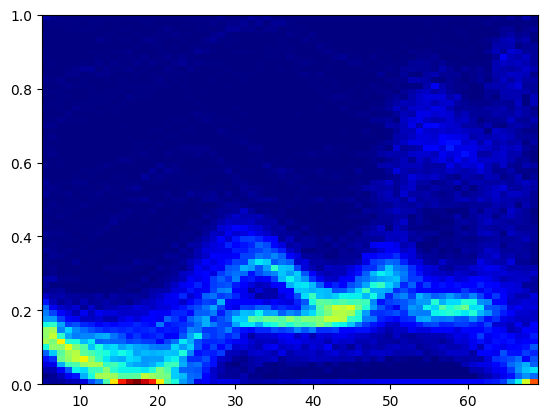

418015
418015


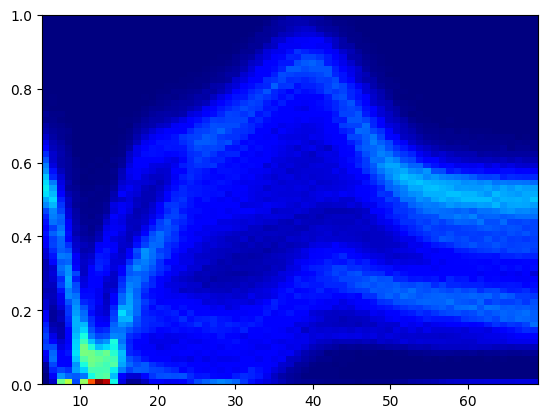

In [179]:
def plot_hist(class_number,size,min_,bins):
    img=train.loc[train[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.savefig(f"Special_{class_number}.png",format="png", bbox_inches='tight', pad_inches=0.2)
    plt.show()
plot_hist(0,70,5,65)
plot_hist(1,70,5,65)
plot_hist(2,70,5,65)
plot_hist(3,70,5,65)
plot_hist(4,70,5,65)

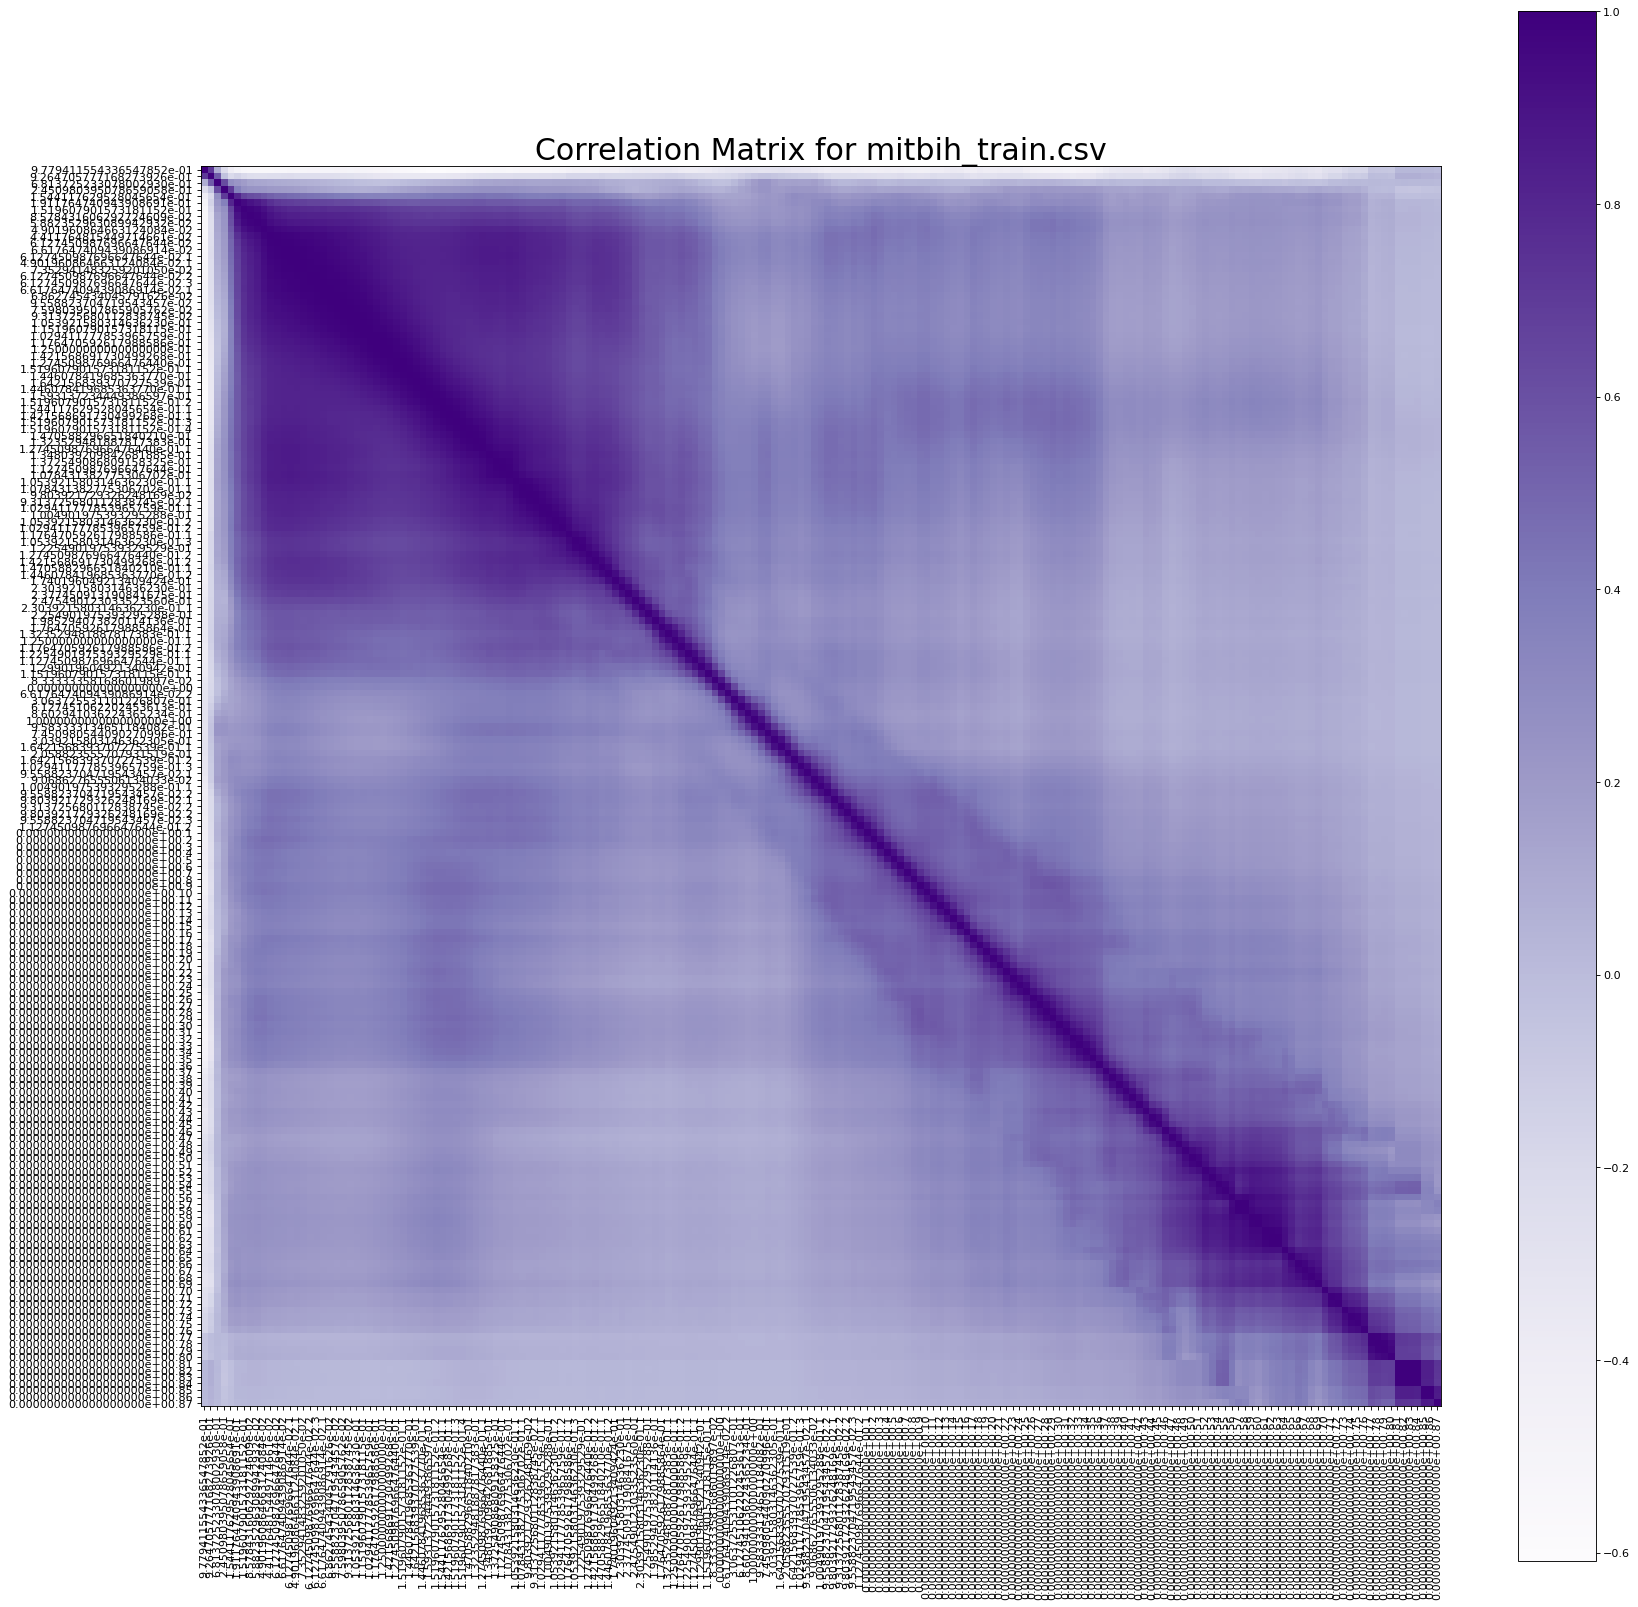

In [46]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna(axis=1)
    df = df[[col for col in df if df[col].nunique() > 1]]
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1, cmap = 'Purples')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=27)
    plt.savefig(f"Correlation_Matrix_text.png",format="png", bbox_inches='tight', pad_inches=0.2)
    plt.show()

jjh = pd.read_csv('F:/Torch_Final/mitbih_train.csv', delimiter=',', nrows = 1000)
jjh.dataframeName = 'mitbih_train.csv'
plotCorrelationMatrix(jjh, 25)

In [43]:
print(len(test[test[187] == 0]))
print(len(test[test[187] == 1]))
print(len(train[train[187] == 0]))
print(len(train[train[187] == 1]))
print(len(train))

18118
556
72471
2223
87554


In [7]:
print(test.info())
print("*************************************")
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB
None
*************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB
None


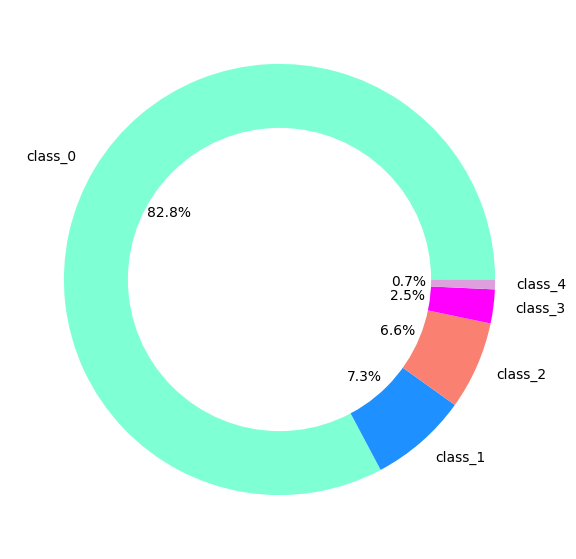

In [3]:
plt.figure(figsize= (7,7))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train[187].value_counts(), labels=['class_0','class_1','class_2','class_3','class_4'], autopct = '%1.1f%%', 
                                            colors = ['aquamarine','dodgerblue','salmon','fuchsia','plum'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig(f"data_ori.png",format="png", bbox_inches='tight', pad_inches=0.2)
plt.show()
# 数据分配不均匀 

In [4]:
df_0 = train[train[187] == 0]
df_1 = train[train[187] == 1]
df_2 = train[train[187] == 2]
df_3 = train[train[187] == 3]
df_4 = train[train[187] == 4]
print(df_1)
print(len(df_0))
print(len(df_1))
print(len(df_0) + len(df_1) + len(df_2) + len(df_3) + len(df_4))

            0         1         2         3         4         5         6    \
72471  1.000000  0.666667  0.100457  0.036530  0.073059  0.050228  0.018265   
72472  0.983696  1.000000  0.331522  0.000000  0.108696  0.163043  0.130435   
72473  1.000000  0.911504  0.216814  0.000000  0.101770  0.199115  0.176991   
72474  0.090498  0.126697  0.217195  0.361991  0.461538  0.556561  0.443439   
72475  0.961111  1.000000  0.551852  0.101852  0.040741  0.085185  0.094444   
...         ...       ...       ...       ...       ...       ...       ...   
74689  1.000000  0.917073  0.253659  0.000000  0.092683  0.185366  0.165854   
74690  0.014837  0.130564  0.213650  0.311573  0.430267  0.548961  0.664688   
74691  1.000000  0.895735  0.199052  0.000000  0.052133  0.052133  0.042654   
74692  0.904059  0.808118  0.195572  0.000000  0.081181  0.114391  0.147601   
74693  1.000000  0.848485  0.203463  0.021645  0.134199  0.203463  0.190476   

            7         8         9    ...       178 

In [5]:
from sklearn.utils import resample

df_1_upsample = resample(df_1, n_samples = 20000, replace = True, random_state = 5237)
df_2_upsample = resample(df_2, n_samples = 20000, replace = True, random_state = 5237)
df_3_upsample = resample(df_3, n_samples = 20000, replace = True, random_state = 5237)
df_4_upsample = resample(df_4, n_samples = 20000, replace = True, random_state = 5237)
df_0 = df_0.sample(n =20000, random_state=5237)
train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])
print(len(train_df))

100000


In [48]:
plt.figure(figsize= (7,7))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train_df[187].value_counts(), labels=['class_0','class_1','class_2','class_3','class_4'], autopct = '%1.1f%%', 
                                               colors = ['aquamarine','dodgerblue','salmon','fuchsia','plum'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig(f"data_aft.png",format="png", bbox_inches='tight', pad_inches=0.2)
plt.show()

In [6]:
import torch
from keras.utils import to_categorical
trainX = train_df.loc[:,train_df.columns!=187]
trainY = train_df.loc[:,train_df.columns==187]
trainY = to_categorical(trainY)
print(trainY[0])
print(trainY[25237])
testX = test.loc[:,test.columns!=187]
testY = test.loc[:,test.columns==187]
testY = to_categorical(testY)

trainX = torch.Tensor(trainX.values)
trainY = torch.Tensor(trainY)
testX = torch.Tensor(testX.values)
testY = torch.Tensor(testY)

[1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0.]


In [40]:
print (testX.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 187 entries, 0 to 186
dtypes: float64(187)
memory usage: 31.2 MB
None


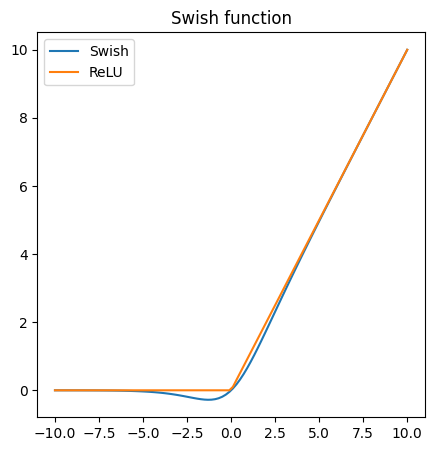

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)
    
x = torch.linspace(-10.0, 10.0, 100)
swish = Swish()
swish_out = swish(x)
relu_out = torch.relu(x)

plt.figure(figsize= (5,5))
plt.title('Swish function')
plt.plot(x.numpy(), swish_out.numpy(), label='Swish')
plt.plot(x.numpy(), relu_out.numpy(), label='ReLU')
plt.legend();
plt.savefig(f"Swish.png",format="png", bbox_inches='tight', pad_inches=0.2)
plt.show()

In [9]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(trainX, trainY)
test_dataset = TensorDataset(testX, testY)

validation_split = 0.2
dataset_size = len(train_dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))

np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]
train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
val_sampler = torch.utils.data.SubsetRandomSampler(val_indices)
print('训练数据量：',len(train_sampler))
print('测试数据量：',len(val_sampler))

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)
val_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=val_sampler)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

import warnings
warnings.filterwarnings("ignore")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

训练数据量： 80000
测试数据量： 20000
cuda


In [79]:
class SelfAttention(nn.Module):
    def __init__(self, hidden_size):
        super(SelfAttention, self).__init__()
        self.hidden_size = hidden_size
        # 线性层
        self.W_q = nn.Linear(hidden_size, hidden_size)
        self.W_k = nn.Linear(hidden_size, hidden_size)
        self.W_v = nn.Linear(hidden_size, hidden_size)
        self.scale = torch.sqrt(torch.tensor(hidden_size, dtype=torch.float32))

    def forward(self, x):
        if x.dim() == 2:
            batch_size, hidden_size = x.size()
            x = x.unsqueeze(1)
        else:
            batch_size, seq_length, hidden_size = x.size()
        Q = self.W_q(x)
        K = self.W_k(x)
        V = self.W_v(x)
        attention_scores = torch.bmm(Q, K.transpose(1, 2)) / self.scale
        attention_weights = nn.Softmax(dim=-1)(attention_scores)

        # 加权求和
        attended_output = torch.bmm(attention_weights, V)
        # print(attended_output.shape, attention_weights.shape)
        return attended_output.squeeze(1), attention_weights

In [142]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, num_classes):
        super(Model, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size_1, batch_first=True, bidirectional=False, num_layers=1)
        self.swish = Swish()
        self.attention = SelfAttention(hidden_size_1)
        self.dropout1 = nn.Dropout(0.3)
        self.lstm2 = nn.LSTM(hidden_size_1, hidden_size_2, batch_first=True, bidirectional=False, num_layers=1)
        self.dropout2 = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_size_2, num_classes)

    def forward(self, x):
        x, _ = self.lstm1(x)
        x = self.swish(x)
        x, attention_weights = self.attention(x)
        x = self.dropout1(x)
        x, _ = self.lstm2(x)
        x = self.dropout2(x)
        x = self.fc(x)
        return x, attention_weights
    
input_size = trainX.shape[1]
hidden_size_1 = 128
hidden_size_2 = 64
num_classes = 5

model = Model(input_size, hidden_size_1, hidden_size_2, num_classes)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [131]:
# 消融
class Model(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, num_classes):
        super(Model, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size_1, batch_first=True, bidirectional=False, num_layers=1)
        self.swish = Swish()
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(hidden_size_1, num_classes)

    def forward(self, x):
        x, _ = self.lstm1(x)
        x = self.swish(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        return x, attention_weights
    
input_size = trainX.shape[1]
hidden_size_1 = 128
hidden_size_2 = 64
num_classes = 5

model = Model(input_size, hidden_size_1, hidden_size_2, num_classes)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [143]:
print(model)
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
epochs = 100

best_val_accuracy = 0
no_improvement_count = 0

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        outputs, attention_weights = model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        target_index = torch.argmax(target, dim=1)  # 转回标签
        train_correct += (predicted == target_index).sum().item()
        train_total += target.size(0)

    train_loss /= len(train_loader)
    train_accuracy = train_correct / train_total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    print(f'Epoch {epoch + 1}/{epochs}:')
    print(f'Training Loss: {train_loss}')
    print(f'Training Accuracy: {train_accuracy}')

    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(val_loader):
            data, target = data.to(device), target.to(device)
            val_outputs, attention_weights = model(data)
            val_loss += criterion(val_outputs, target).item()
            _, val_predicted = torch.max(val_outputs, 1)
            target_index = torch.argmax(target, dim=1)
            val_correct += (val_predicted == target_index).sum().item()
            val_total += target.size(0)

    val_loss /= len(val_loader)
    val_accuracy = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Validation Loss: {val_loss}')
    print(f'Validation Accuracy: {val_accuracy}')

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    if no_improvement_count >= 5:
        print("Early stopping! Validation accuracy has not improved for 5 epochs.")
        break

    print('-' * 50)

Epoch 1/100:
Training Loss: 0.7976339924335479
Training Accuracy: 0.68975
Validation Loss: 0.5271038656022139
Validation Accuracy: 0.80785
--------------------------------------------------
Epoch 2/100:
Training Loss: 0.47684996790885925
Training Accuracy: 0.8293125
Validation Loss: 0.39876445007931655
Validation Accuracy: 0.85885
--------------------------------------------------
Epoch 3/100:
Training Loss: 0.38206350836753844
Training Accuracy: 0.864975
Validation Loss: 0.3508568820869847
Validation Accuracy: 0.8724
--------------------------------------------------
Epoch 4/100:
Training Loss: 0.32670842590332033
Training Accuracy: 0.885075
Validation Loss: 0.2978604985460354
Validation Accuracy: 0.8926
--------------------------------------------------
Epoch 5/100:
Training Loss: 0.283859996676445
Training Accuracy: 0.8991125
Validation Loss: 0.25965749771352026
Validation Accuracy: 0.90505
--------------------------------------------------
Epoch 6/100:
Training Loss: 0.258395394229

Epoch 44/100:
Training Loss: 0.045032604744285346
Training Accuracy: 0.985525
Validation Loss: 0.06480815879122656
Validation Accuracy: 0.98135
--------------------------------------------------
Epoch 45/100:
Training Loss: 0.04566232942342758
Training Accuracy: 0.98525
Validation Loss: 0.06106162907045548
Validation Accuracy: 0.9824
--------------------------------------------------
Epoch 46/100:
Training Loss: 0.04505802779756486
Training Accuracy: 0.9852875
Validation Loss: 0.05762481184344098
Validation Accuracy: 0.982
--------------------------------------------------
Epoch 47/100:
Training Loss: 0.04182240806892514
Training Accuracy: 0.9865125
Validation Loss: 0.053368835787104954
Validation Accuracy: 0.98585
--------------------------------------------------
Epoch 48/100:
Training Loss: 0.04203721739985049
Training Accuracy: 0.9861125
Validation Loss: 0.06898331351779924
Validation Accuracy: 0.9784
--------------------------------------------------
Epoch 49/100:
Training Loss: 0

In [144]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('model accuracy')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')
ax[0].legend(['train', 'val'])

ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('model loss')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')
ax[1].legend(['train', 'val'])

plt.savefig(f"Curve.png",format="png", bbox_inches='tight', pad_inches=0.2)
plt.show()

In [145]:
import matplotlib.colors as mcolors
model.eval()
test_loss = 0.0
test_correct = 0
test_total = 0

all_predicted = []
all_targets = []

with torch.no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        data, target = data.to(device), target.to(device)
        test_outputs, attention_weights = model(data)
        test_loss += criterion(test_outputs, target).item()
        _, test_predicted = torch.max(test_outputs, 1)
        target_index = torch.argmax(target, dim=1)
        test_correct += (test_predicted == target_index).sum().item()
        test_total += target.size(0)
        
        all_predicted.extend(test_predicted.cpu().numpy())
        all_targets.extend(target_index.cpu().numpy())

test_loss /= len(test_loader)
test_accuracy = test_correct / test_total

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Test Loss: 0.19200557528351647
Test Accuracy: 0.9535446738534624


              precision    recall  f1-score   support

           0       0.99      0.96      0.97     18118
           1       0.49      0.84      0.62       556
           2       0.91      0.92      0.91      1448
           3       0.43      0.88      0.58       162
           4       0.97      0.98      0.97      1608

    accuracy                           0.95     21892
   macro avg       0.76      0.91      0.81     21892
weighted avg       0.97      0.95      0.96     21892

Precision: 0.7572164139303379
Recall: 0.914954013977107
F1 Score: 0.8118081358993358


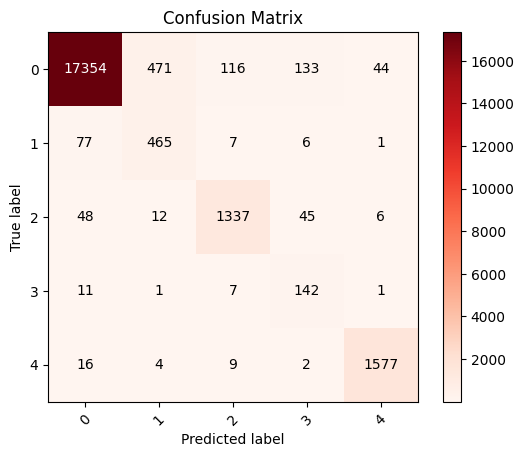

In [148]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

print(classification_report(all_targets, all_predicted))

# 精准率
precision = precision_score(all_targets, all_predicted, average='macro')
print(f"Precision: {precision}")

# 召回率
recall = recall_score(all_targets, all_predicted, average='macro')
print(f"Recall: {recall}")

# F1
f1 = f1_score(all_targets, all_predicted, average='macro')
print(f"F1 Score: {f1}")

# 混淆矩阵
confusion_mat = confusion_matrix(all_targets, all_predicted)
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(set(all_targets)))
plt.xticks(tick_marks, set(all_targets), rotation=45)
plt.yticks(tick_marks, set(all_targets))

thresh = confusion_mat.max() / 2.
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        plt.text(j, i, format(confusion_mat[i][j], 'd'),
                 ha='center',
                 va='center',
                 color="white" if confusion_mat[i][j] > thresh else "black")

plt.ylabel("True label")
plt.xlabel("Predicted label")

plt.savefig(f"Matrix.png",format="png", bbox_inches='tight', pad_inches=0.2)
plt.show()

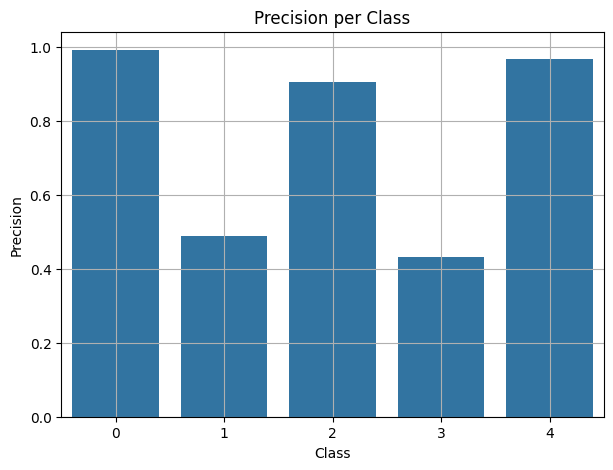

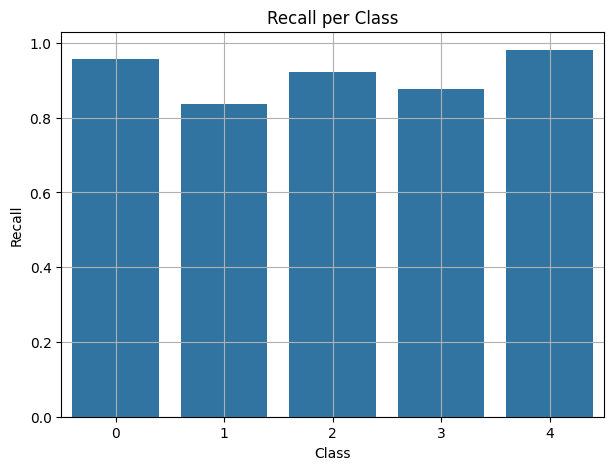

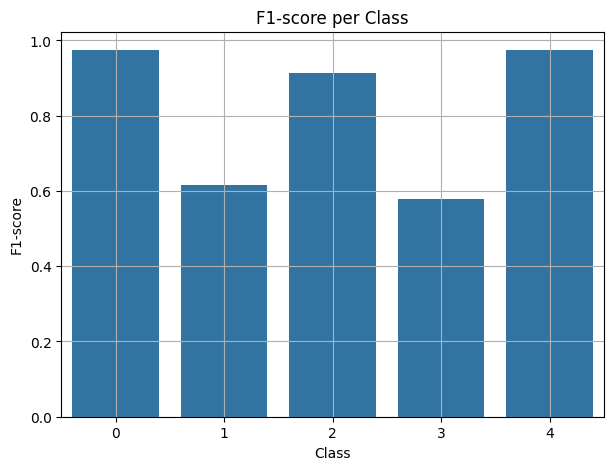

In [151]:
from sklearn.metrics import classification_report
import seaborn as sns

report = classification_report(all_targets, all_predicted, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
for metric in metrics:
    plt.figure(figsize=(7, 5))
    sns.barplot(x=list(report.keys())[:-3],
                y=[report[label][metric] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']])
    plt.title(f'{metric.capitalize()} per Class')
    plt.xlabel('Class')
    plt.ylabel(metric.capitalize())
    plt.grid()
    plt.savefig(f"{metric}_curve.png",format="png", bbox_inches='tight', pad_inches=0.2)
    plt.show()


In [83]:
# Swish
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('jjh`s model accuracy')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')
ax[0].legend(['train', 'val'])

ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('jjh`s model loss')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')
ax[1].legend(['train', 'val'])

plt.show()

In [80]:
# ReLU
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('jjh`s model accuracy')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')
ax[0].legend(['train', 'val'])

ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('jjh`s model loss')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')
ax[1].legend(['train', 'val'])

plt.show()